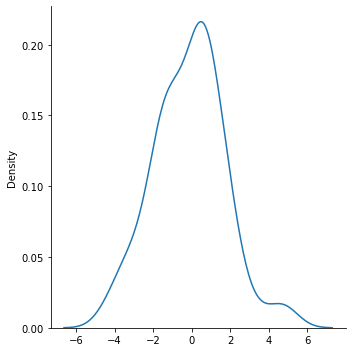

In [1]:
from numpy import random, array,exp,sqrt,pi
import matplotlib.pyplot as plt

from pylab import plot,show
import seaborn as sns

#Get sample points and plot distribution
# stdev=2, variance = 4
x_points=random.normal(0,2,size=100)
sns.displot(x_points,kind='kde')
show()

In [8]:
def sumsq(array):
    'it returns the sum of the squares of the elements in the array'
    
    summation=0
    for x in array:
        summation+= x*x
    return summation

def a_fun(a,sum_of_squares_of_data,array_lenght):
    
    return 1/(2* pi*a)**(array_lenght/2)*exp(-sum_of_squares_of_data/(2*a))


a_fun(1,sumsq(x_points),len(x_points))


1.6803408336675886e-113

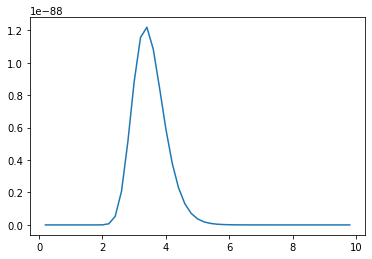

3.4000000000000004

In [3]:
a_ls=[]
a_val=[]
n=50 #number of points 
a_max=10 # max value of a

for a in range(n):
    if a==0:
        pass
    else:
        a_ls.append(a_fun(a/n*a_max,sumsq(x_points),len(x_points)))
        a_val.append(a/n*a_max)

#a_ls
plot(a_val,a_ls)
show()
a_val[a_ls.index(max(a_ls))]

In [4]:
#Applying the Metropolis hasting algorithm to get Markov Chain
#def functions for algorithm

def g(x_old):
    return random.normal(x_old,.5)

def p(x):
    return 1000*random.uniform()

def acceptance(x_attempt,x_old):
    return min(1,p(x_attempt)/p(x_old)*g(x_old)/g(x_attempt))


-0.6454231460733532


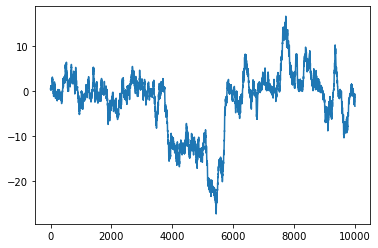

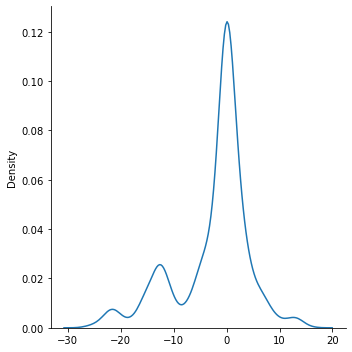

In [6]:
from collections import Counter

def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
# apply algorithm
x_current=0 # to keep track o current x (initialize to zero)
x_points_chain=[]
for t in range(10000):

    x_attempt=g(x_current)

    acceptance_p=acceptance(x_attempt,x_current)

    u=random.uniform()

    if u<=acceptance_p:
        x_current=x_attempt

    #else the state stays the same

    x_points_chain.append(x_current)
    

plot(x_points_chain)
sns.displot(x_points_chain,kind='kde')
#print(sum(x_points_chain)/len(x_points_chain))
print(most_frequent(x_points_chain))
show()